### Data Load

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
torch.manual_seed(0)

In [2]:
gs = pd.read_csv('gs_boo.csv', encoding = 'EUC-KR')
gs

,회사명,거래소코드,회계년도,자산총계,부채총계,자본총계,매출액,매출원가,매출총이익,판매비와 관리비,...,비유동자산,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,비유동장기적합률
0,지에스건설(주),6360,Dec-81,128425,113446,14980,105579,96756,8823,6248,...,35273,0.019031,0.163151,0.024399,0.023149,0.893537,0.116643,18.597705,0.260653,2.306329
1,지에스건설(주),6360,Dec-82,151771,128452,23318,152111,137236,14875,7754,...,41312,0.025156,0.163736,0.046808,0.025100,1.132901,0.153640,10.528852,0.749201,0.957382
2,지에스건설(주),6360,Dec-83,166438,139283,27154,240839,220506,20333,9298,...,37230,0.028527,0.174855,0.045819,0.019714,1.076706,0.163149,11.416639,0.517862,1.182656
3,지에스건설(주),6360,Dec-84,182495,153671,28824,277801,254708,23093,11695,...,42375,0.017179,0.108764,0.041029,0.011285,1.138456,0.157944,12.595984,0.721935,0.990255
4,지에스건설(주),6360,Dec-85,206772,176681,30091,266215,245456,20759,10952,...,49338,0.007675,0.052740,0.036839,0.005961,1.130991,0.145527,14.482049,0.759678,0.993096
5,지에스건설(주),6360,Dec-86,249015,219908,29108,280779,251328,29451,9641,...,48931,0.006574,0.056239,0.070554,0.005830,1.224302,0.116892,18.025246,1.154299,0.712439
6,지에스건설(주),6360,Dec-87,223617,181387,42230,285351,262554,22797,9765,...,35409,0.013425,0.071087,0.045670,0.010520,1.625855,0.188850,7.433893,1.853399,0.393315
7,지에스건설(주),6360,Dec-88,347019,248614,98406,324475,292177,32298,13190,...,63619,0.029667,0.104618,0.058889,0.031728,1.637408,0.283574,6.215350,1.187303,0.550647
8,지에스건설(주),6360,Dec-89,487910,379863,108047,427284,382651,44634,16619,...,127824,0.029050,0.131184,0.065565,0.033172,1.513984,0.221449,9.496575,1.111082,0.702241
9,지에스건설(주),6360,Dec-90,709013,568961,140052,523936,449656,74280,19798,...,171947,0.022811,0.115479,0.103986,0.030868,1.401194,0.197531,11.978126,1.079809,0.737432


In [3]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   회사명           39 non-null     object 
 1   거래소코드         39 non-null     int64  
 2   회계년도          39 non-null     object 
 3   자산총계          39 non-null     int64  
 4   부채총계          39 non-null     int64  
 5   자본총계          39 non-null     int64  
 6   매출액           39 non-null     int64  
 7   매출원가          39 non-null     int64  
 8   매출총이익         39 non-null     int64  
 9   판매비와 관리비      39 non-null     int64  
 10  영업이익          39 non-null     int64  
 11  당기순이익         39 non-null     int64  
 12  유동자산          39 non-null     int64  
 13  유동부채          39 non-null     int64  
 14  비유동부채         39 non-null     int64  
 15  자본금           39 non-null     int64  
 16  비유동자산         39 non-null     int64  
 17  총자산수익률(ROA)   39 non-null     float64
 18  자기자본수익률(ROE)  39 non-null     fl

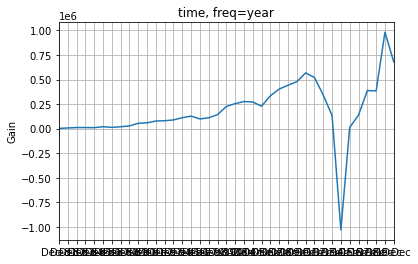

In [4]:
x = gs['회계년도']
plt.title('time, freq=year')
plt.ylabel('Gain')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(x,gs['영업이익'])
plt.show()

## biLSTM + F.C

### Data_setting

In [5]:
def data_setting(df):
    df = df.values.astype(float)

    test_data_size = 1
    train_data = df[:-test_data_size]
    test_data = df[-test_data_size:]
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    
    train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))
    train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
    
    return train_data_normalized, test_data, scaler

### Create_inout_sequences

In [6]:
def create_inout_sequences(input_data, fw, period):
    inout_seq = []
    L = len(input_data)
    
    for i in range(0, L-period*fw, fw):
        train_seq = input_data[i:i+period*fw]
        train_label = input_data[i+(period+1)*fw-1:i+(period+1)*fw]
        inout_seq.append((train_seq ,train_label))
        
    return inout_seq

### biLSTM+F.C

In [7]:
class LSTM(nn.Module):
    
    def __init__(self, fw, period, layers, hidden_layer_size = 100, output_size = 1):
        super().__init__()
        self.input_size = fw
        self.hidden_layer_size = hidden_layer_size
        self.output_size = output_size
        self.period = period

        self.lstm = nn.LSTM(self.input_size, self.hidden_layer_size, num_layers=layers, bidirectional=True)

        self.linear = nn.Sequential(
            nn.Linear(hidden_layer_size*2, 20),
            nn.Linear(20, 10),
            nn.Linear(10, self.output_size)
        )
        
        self.hidden = (torch.zeros(layers*2,period,hidden_layer_size),
                       torch.zeros(layers*2,period,hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq.view(-1, self.period , self.input_size),self.hidden)
        predictions = self.linear(lstm_out.view(self.period, self.hidden_layer_size*2))
        return predictions[-self.output_size:]

In [8]:
train_window = 5
period = 16
learning_rate = 0.01
layers = 2

In [9]:
df = gs.loc[:,['당기순이익', '매출액', '매출총이익', '유동자산', '영업이익']]
train_data_normalized,test_data,scaler = data_setting(df)
train_inout_seq = create_inout_sequences(train_data_normalized, train_window, period)

In [10]:
model = LSTM(train_window,period, layers)

In [11]:
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 250

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        y_pred = model(seq)[0]
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.02762251
epoch:  26 loss: 0.01827719
epoch:  51 loss: 0.01603314
epoch:  76 loss: 0.00064810
epoch: 101 loss: 0.00068628
epoch: 126 loss: 0.00066975
epoch: 151 loss: 0.00379515
epoch: 176 loss: 0.00452046
epoch: 201 loss: 0.00595820
epoch: 226 loss: 0.01953400
epoch: 249 loss: 0.0001846308


In [12]:
fut_pred = 1
test_inputs = train_data_normalized[-period*train_window:].tolist()

In [13]:
len(test_inputs)

80

In [14]:
model(seq)

tensor([[-0.7101]], grad_fn=<SliceBackward>)

In [15]:
model.eval()

for i in [1]:
    seq = torch.FloatTensor(test_inputs[-period*train_window:])
    pred = model(seq)
    with torch.no_grad():
        test_inputs.append(float(model(seq)[-1]))

In [16]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[-fut_pred:]).reshape(-1, 1))
ans = gs['영업이익'][-5:]

In [17]:
actual_predictions[0]

array([672654.94471574])

In [18]:
ans[-1:]

38    680931
Name: 영업이익, dtype: int64

In [19]:
RMSE = mean_squared_error(ans[-1:],actual_predictions[-1:])**0.5

In [20]:
RMSE

8276.055284261238